<a href="https://colab.research.google.com/github/emmanueluzodike/Natural_Language_Processing/blob/main/Text%20Classification/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import csv
import pandas as pd
import nltk
nltk.download('popular')

DATA DETAILS

This dataset contains Item description as a feature and 4 different categories / classes - Household, Electronics, Books, Clothing & Accessories.

The model should be able to predict the catogry of an item given its description

In [2]:
with open("/content/ecommerceDataset.csv", encoding='ISO-8859-1') as file:
  data = pd.read_csv(file) 

In [3]:
data.columns=['category', 'description']

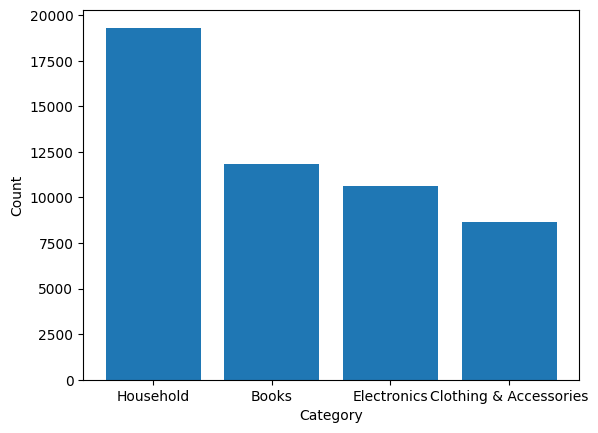

In [4]:
import matplotlib.pyplot as plt

# Plot categroty distribution
class_counts = data['category'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [5]:
data.tail()

,category,description
50419,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50420,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50421,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50422,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."
50423,Electronics,Micromax Canvas Win W121 (White)


## Text Preprocessing

In [6]:
# remove null rows
data.dropna(inplace=True)

# remove duplicate rows
data.drop_duplicates(inplace=True)

In [7]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words='english', binary=True)

In [8]:
y = data.category
X = data.description

In [9]:
X.head()

0    SAF 'Floral' Framed Painting (Wood, 30 inch x ...
1    SAF 'UV Textured Modern Art Print Framed' Pain...
2    SAF Flower Print Framed Painting (Synthetic, 1...
3    Incredible Gifts India Wooden Happy Birthday U...
4    Pitaara Box Romantic Venice Canvas Painting 6m...
Name: description, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y, columns=['Class'])

# Retrieve the encoding key pair values

In [11]:
y

,Class
0,3
1,3
2,3
3,3
4,3
...,...
27796,2
27797,2
27798,2
27799,2


In [12]:
y.head()

,Class
0,3
1,3
2,3
3,3
4,3


Train and Test sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, train_size = 0.6, random_state=1234)

X_train.shape

(16680,)

In [14]:
y_train

,Class
5813,3
21621,1
6115,3
3177,3
10618,0
...,...
62,3
3497,3
4691,3
10584,0


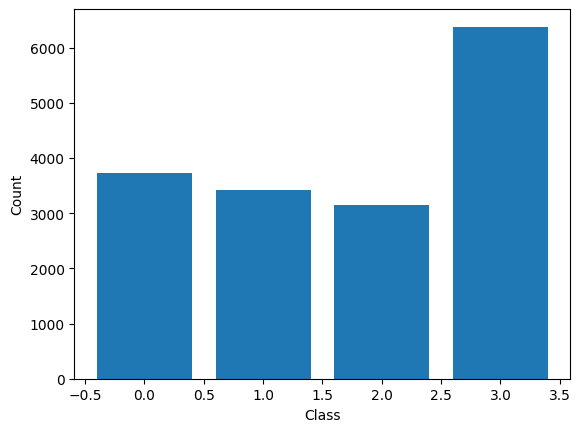

In [15]:
import matplotlib.pyplot as plt

# training class distribution
class_counts = y_train['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

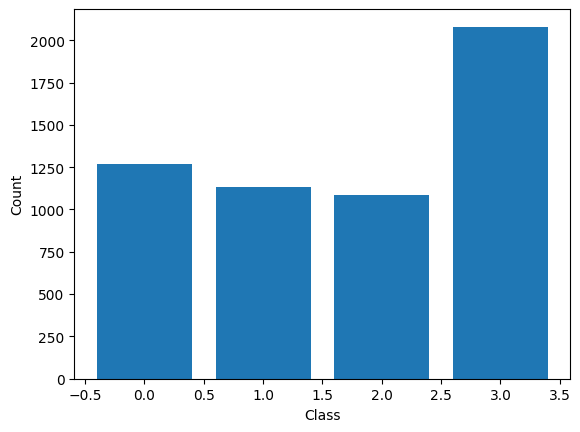

In [16]:
# testing class distribution
class_counts = y_test['Class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [17]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [18]:
# take a peek at the data

print('train size:', X_train.shape)
print(X_train.toarray()[:5])

print('\ntest size:', X_test.shape)
print(X_test.toarray()[:5])


train size: (16680, 63419)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test size: (5561, 63419)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Train Naive Bayes classifier

In [19]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [20]:
import numpy as np
class_counts = np.bincount(y_train.to_numpy().flatten())
priors = class_counts / len(y_train)

# calculate log priors:
log_priors = np.log(priors)

In [21]:
class_counts

array([3737, 3421, 3142, 6380])

In [22]:
log_priors

array([-1.49592725, -1.58427749, -1.66935086, -0.9610423 ])

In [23]:
naive_bayes.feature_log_prob_

array([[-11.2862751 ,  -9.57611318, -11.15357095, ..., -11.37345481,
        -11.24951245, -11.37345481],
       [-11.07620252, -11.2469194 , -11.31445187, ..., -11.31445187,
        -10.97603523, -11.31445187],
       [-10.59835439,  -9.64449622, -10.45194393, ..., -11.35815454,
        -10.62686998, -11.21576848],
       [ -9.90089407,  -9.59663291, -11.26092752, ..., -11.4499419 ,
        -10.96317146, -11.55967299]])

Evaluate on the test data

In [24]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# make prediction on the test data
pred = naive_bayes.predict(X_test)

# print confusion matrix
print(confusion_matrix(y_test, pred))

[[1121    9   10  127]
 [   1 1021    1  108]
 [  18    2  848  215]
 [   9    9   30 2032]]


In [25]:
print('accuracy score: ', accuracy_score(y_test, pred))

precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

print('Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}'.format(precision, recall, f1))

accuracy score:  0.903074986513217
Precision: 0.932, Recall: 0.887, F1-score: 0.905


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))



              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1267
           1       0.98      0.90      0.94      1131
           2       0.95      0.78      0.86      1083
           3       0.82      0.98      0.89      2080

    accuracy                           0.90      5561
   macro avg       0.93      0.89      0.90      5561
weighted avg       0.91      0.90      0.90      5561



Train Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=2.5, n_jobs=4, solver='lbfgs', random_state=1234, verbose=1)
clf.fit(X_train, y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    8.8s finished


LogisticRegression(C=2.5, n_jobs=4, random_state=1234, verbose=1)

Evaluate the data

In [28]:
pred2 = clf.predict(X_test)

In [29]:
confusion_matrix(y_test, pred2)

array([[1187,    9,   17,   54],
       [   5, 1099,    3,   24],
       [  30,    4,  975,   74],
       [  16,   14,   37, 2013]])

In [30]:
print('accuracy score: ', accuracy_score(y_test, pred2))

precision = precision_score(y_test, pred2, average='macro')
recall = recall_score(y_test, pred2, average='macro')
f1 = f1_score(y_test, pred2, average='macro')

print('Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}'.format(precision, recall, f1))

accuracy score:  0.9483905772343104
Precision: 0.952, Recall: 0.944, F1-score: 0.948


Train Nueral Net

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# pipe1 = Pipeline([
#         ('neuralnet', MLPClassifier(solver='lbfgs', alpha=1e-5,
#                    hidden_layer_sizes=(15, 7), random_state=1234)),
#          ])

# pipe1.fit(X_train, y_train)


In [33]:
# pred4 = pipe1.predict(X_test)

# from sklearn import metrics
# #print(metrics.classification_report(y_train, pred3))

# #print("Confusion matrix:\n", metrics.confusion_matrix(y_train, pred3))

# # import numpy as np
# # print("\nOverall accuracy: ", np.mean(pred==y_train))
# print('accuracy score: ', accuracy_score(y_test, pred4))

# precision = precision_score(y_test, pred4, average='macro')
# recall = recall_score(y_test, pred4, average='macro')
# f1 = f1_score(y_test, pred4, average='macro')

# print('Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}'.format(precision, recall, f1))

accuracy score:  0.9280704909188995
Precision: 0.931, Recall: 0.923, F1-score: 0.927


In [79]:
clf2 = MLPClassifier(activation='logistic',
                    alpha=1e-5,
                    hidden_layer_sizes=(15,7),
                    early_stopping=True,
                    solver="lbfgs",
                    learning_rate_init=0.001,
                    random_state=1234,
                    max_iter =200
                    )

clf2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1e-05, early_stopping=True,
              hidden_layer_sizes=(15, 7), random_state=1234, solver='lbfgs')

Evaluate the model

In [80]:
pred3 = clf2.predict(X_test)

from sklearn import metrics
#print(metrics.classification_report(y_train, pred3))

#print("Confusion matrix:\n", metrics.confusion_matrix(y_train, pred3))

# import numpy as np
# print("\nOverall accuracy: ", np.mean(pred==y_train))
a = accuracy_score(y_test, pred3)
print('accuracy score: ', a)

precision = precision_score(y_test, pred3, average='macro')
recall = recall_score(y_test, pred3, average='macro')
f1 = f1_score(y_test, pred3, average='macro')

print('Precision: {:.3f}, Recall: {:.3f}, F1-score: {:.3f}'.format(precision, recall, f1))

accuracy score:  0.9420967451897141
Precision: 0.946, Recall: 0.938, F1-score: 0.942


Record Nueral Net Hyper Parameters

In [77]:
with open('history.csv', 'a', newline='') as file:
  writer = csv.writer(file)

#   writer.writerow(
#      ['activation', "alpha", "hidden_layer_sizes",
#                      'early_stopping',
#                      'solver',
#                      'learning_rate_init',
#                      'Max_iter',
#                       'Test Accuracy',
#                       'Precision',
#                       'Recall',
#                       'F1-score']
#  )

  writer.writerow([clf2.activation,
                    clf2.alpha,
                    clf2.hidden_layer_sizes,
                    clf2.early_stopping,
                    clf2.solver,
                    clf2.learning_rate_init,
                    clf2.max_iter,
                    a,
                    precision,
                    recall,
                    f1,
                    ])